PARTE I

1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no
supervisado?


El aprendizaje supervisado aplica para un set de datos etiquetados y busca relación entre variables de entrada y salida.
El aprendizaje no supervisado aplica para un set de datos no etiquetados y busca relación entre variables de entrada sin una guía.

2. En la industria de la salud, a menudo se utiliza el machine learning para predecir la
probabilidad de enfermedades o condiciones médicas en función de diferentes
variables de entrada, como síntomas, antecedentes médicos y factores de estilo de
vida. Imagina que tienes un conjunto de datos que contiene información de
pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje
utilizarías para construir un modelo predictivo?


Se utilizaría un aprendizaje supervisado, se alcanza a notar que el set de datos puede estar etiquetado y como la variable es categorica utilizaría el modelo clasificatorio

3. ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de
realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la
función de cada uno?

Es necesario para evaluar el rendimiento del modelo, entrenamiento y prueba son las funciones

4. ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un
enfoque estadístico y un enfoque de aprendizaje de máquinas?

En el enfoque estadistico se trata de encontrar las correlaciones de las variables  y en el machine learning  es para la predicción.

5. Escoje una industria de acuerdo a su área de interés, rubro de trabajo o área de
estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).
Menciona al menos 1 aplicación en esa industria de:
a. Aprendizaje Supervisado (Clasificación)
b. Aprendizaje Supervisado (Regresión)
c. Aprendizaje No Supervisado (Clustering)
d. Aprendizaje No Supervisado (Reducción de dimensionalidad)


a. Se aplica si queremos saber por medio de variables de monitoreo si el server esta activo o inactivo en el momento que se pregunte.

b. Se aplica si queremos saber cuantos empleados activos ahora seguiran aqui el siguiente mes.


c. Se aplica si queremos saber en que area de la empresa se están teniendo más gastos contando salarios

d. Se aplica si queremos saber en que seccion de nuestros routers (Administracion,Area de trabajo, direcciones, salas de juntas, recepcion) de la empresa se utiliza más internet y de cuanto es el consumo promedio por usuario en esa area.

PARTE II

6. Carga los datos de la base data_housing.csv e importa las librerías necesarias para
cargar los datos en un DataFrame, manipularlos, hacer cálculos, analizarlos y
construir modelos de regresión lineal. Utiliza Pandas, NumPy y Scikit-learn.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#FernandoSanchez Cargar datos en un DataFrame
data = pd.read_excel('data-housing.xlsx')

7. Genera un informe de calidad de datos de la base. Analiza la existencia de datos
atípicos, extraños o nulos. Además, analiza las posibles correlaciones entre las
variables.

In [7]:
#FernandoSanchez Analizar datos nulos, atípicos y correlaciones
data_info = pd.DataFrame(data.dtypes, columns=['DataType'])
data_info['MissingValues'] = data.isnull().sum()
data_info['UniqueValues'] = data.nunique()

#FernandoSanchez Resumen estadístico
summary_stats = data.describe()

#FernandoSanchez Convertir columnas no numéricas a numéricas
data_encoded = pd.get_dummies(data)
correlation_matrix = data_encoded.corr()


#FernandoSanchez Visualizar informe
print("Información del DataFrame:")
print(data_info)
print("\nResumen estadístico:")
print(summary_stats)
print("\nMatriz de correlación:")
print(correlation_matrix)

"""Podemos notar los tipos de datos y que no nos faltan valores, ademas con el resumen estadistico los minimos y maximos de la variable objetivo que es el precio, en la
matriz de correlación muestra la relación lineal entre las variables numéricas. 
Los valores van de -1 a 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica ninguna correlación.
Además notamos una correlacion moderada entre precio y (area,baños,historias,aire acondicionado_si)"""

Información del DataFrame:
                DataType  MissingValues  UniqueValues
price              int64              0           219
area               int64              0           284
bedrooms           int64              0             6
bathrooms          int64              0             4
stories            int64              0             4
guestroom         object              0             2
hotwaterheating   object              0             2
airconditioning   object              0             2
parking            int64              0             4

Resumen estadístico:
              price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000 

8. Genera un modelo de regresión lineal. Para ello:
a. Importa el estimador de regresión lineal de Scikit-learn.
b. Divide los datos (80% train y 20% test)
c. Crea una instancia del modelo de regresión lineal.
d. Ajusta el modelo utilizando los datos de entrenamiento.


In [11]:
#FernandoSanchez Aplico one-hot encoding a las variables categóricas
data_encoded = pd.get_dummies(data, columns=['guestroom', 'hotwaterheating', 'airconditioning'])

#FernandoSanchez b.Dividir los datos
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez c.Modelo de regresión lineal
model = LinearRegression()
#FernandoSanchez d.Ajustar modelo
model.fit(X_train, y_train)


LinearRegression()

9. Evalúa el modelo. Para ello:
a. Utiliza los datos de prueba para realizar predicciones con el modelo
entrenado.
b. Evalúa el rendimiento del modelo comparando las predicciones con los
valores reales.
c. Calcula métricas de evaluación, como el error cuadrado medio (MSE) o el
coeficiente de determinación (R^2), y grafica los coeficientes.


Métricas de evaluación:
Error cuadrado medio (MSE): 1961490677565.4868
Coeficiente de determinación (R^2): 0.6119372009958435


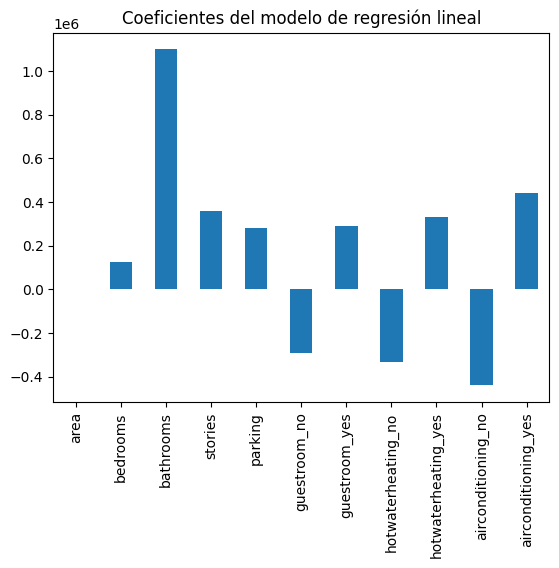

In [12]:
# a. Realizar predicciones con datos de prueba
y_pred = model.predict(X_test)

# b. Evaluar rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# c. Imprimir métricas y graficar coeficientes
print("\nMétricas de evaluación:")
print("Error cuadrado medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

# Graficar coeficientes
coeficientes = pd.Series(model.coef_, index=X.columns)
coeficientes.plot(kind='bar')
plt.title("Coeficientes del modelo de regresión lineal")
plt.show()

"""El MSE indica que las predicciones del modelo tienen un error cuadrático de alrededor de 1,961,490,677,565.49 unidades cuadradas de la variable objetivo.
El R^2 sugiere que el modelo explica un 61.2% de la variabilidad en los precios. 
Un R^2 de 0.612 indica un buen ajuste, pero aún hay un porcentaje significativo de variabilidad no explicada por el modelo, Se podría explorar otros modelos"""